#### Submitted by: Shreyas Kulkarni (Person ID: 50249367)

#### Groupmate: Soham Gupte (Person ID: 50244656)

# 1) Positive tested stacked bar plot

Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”

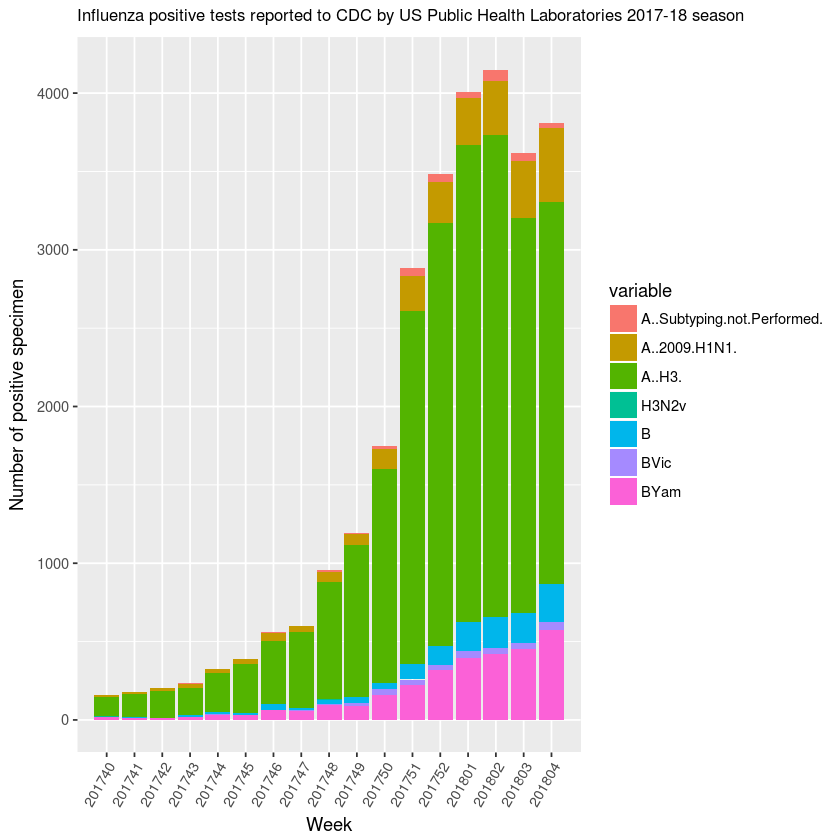

In [51]:
flu<-read.csv("FluView_StackedColumnChart_Data.csv")

flu<-transform(flu,xyz=interaction(flu$YEAR,formatC(flu$WEEK, width=2, flag="0"),sep=''))

flu$xyz<-as.numeric(as.character(flu$xyz))
flu$ID <- seq.int(nrow(flu))
DF<-flu[,c('A..Subtyping.not.Performed.','A..2009.H1N1.','A..H3.','H3N2v','B','BVic','BYam','ID')]
require(reshape2)
DF1 <- melt(DF, id.var='ID')
flu<-read.csv("FluView_StackedColumnChart_Data.csv")

flu<-transform(flu,xyz=interaction(flu$YEAR,formatC(flu$WEEK, width=2, flag="0"),sep=''))

flu$xyz<-as.numeric(as.character(flu$xyz))
flu$ID <- seq.int(nrow(flu))
DF<-flu[,c('A..Subtyping.not.Performed.','A..2009.H1N1.','A..H3.','H3N2v','B','BVic','BYam','ID')]
require(reshape)
DF1 <- melt(DF, id.var='ID')

library(ggplot2)
ggplot(DF1, aes(x = ID, y = value,fill=variable)) +
  geom_bar(stat = "identity")+
  scale_x_discrete(limit = flu$ID,
                   labels = flu$xyz)+
  theme(axis.text.x = element_text(angle = 60, hjust = 1))+
  xlab("Week")+
  ylab("Number of positive specimen")+
  ggtitle("Influenza positive tests reported to CDC by US Public Health Laboratories 2017-18 season")+
  theme(plot.title = element_text(size=10))


# 2) Pie charts

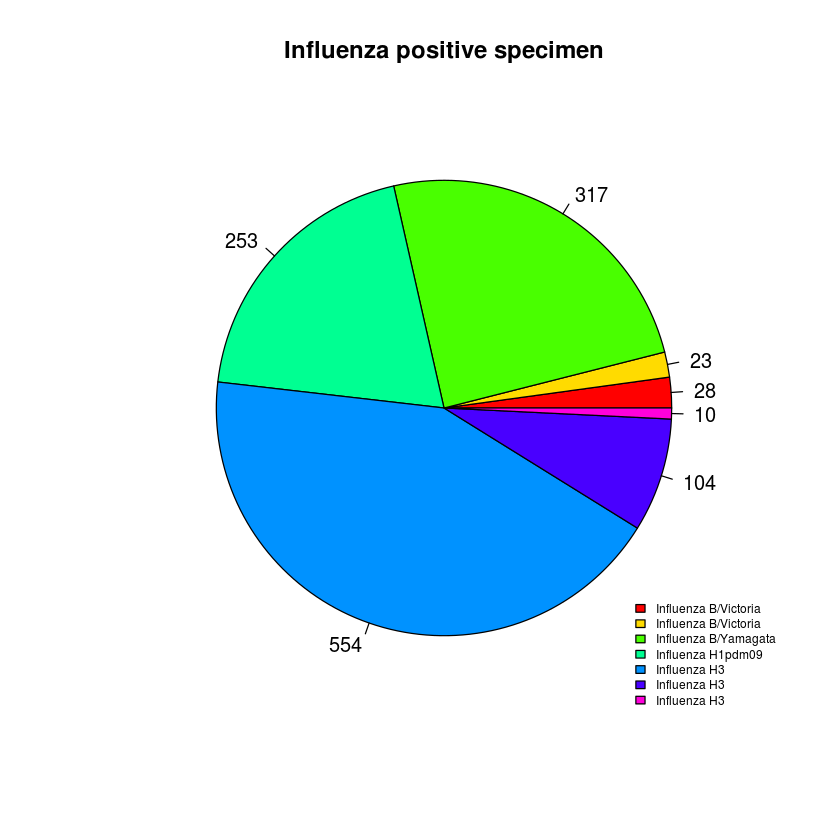

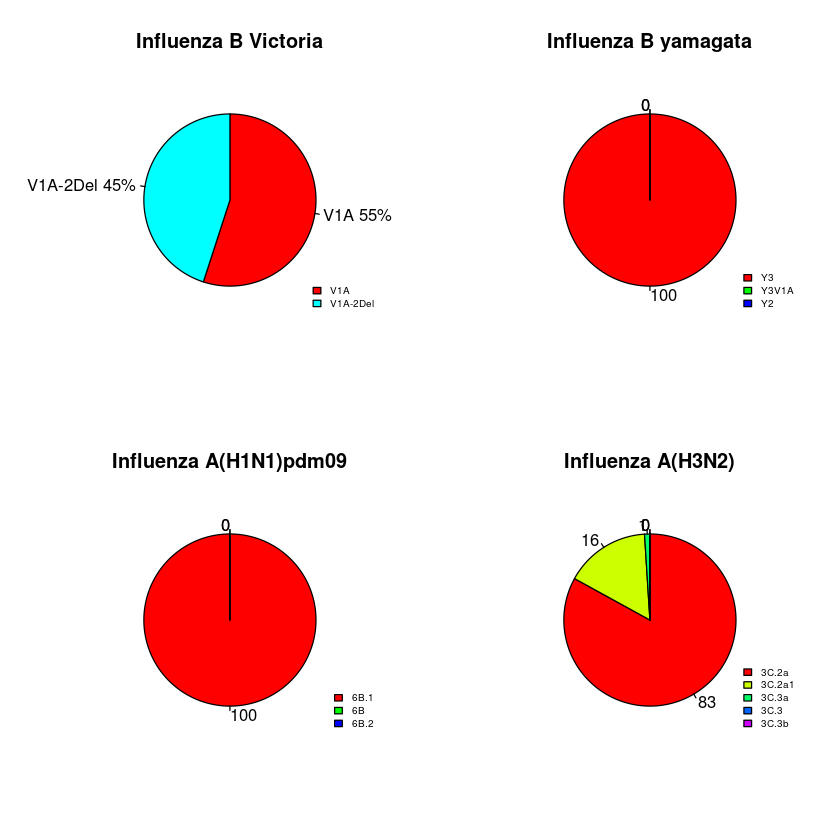

In [45]:

flu2<-read.csv("Genetic04.csv")
#names(flu2)

subflu2<-subset(flu2, flu2$Number != 0)
x<-subflu2$Number
lbls<-subflu2$X.Sub.type
#x11()
pie(x,labels = x,col=rainbow(length(lbls)),main = "Influenza positive specimen",clockwise=FALSE)
legend("bottomright", legend = paste("Influenza",subflu2$X.Sub.type), fill=rainbow(length(lbls)), bty="n",cex=0.6)

par(mfrow=c(2,2)) 
BVict<-subset(flu2, flu2$X.Sub.type == 'B/Victoria')
#names(BVict)
#gsub("[^0-9]", "", BVict$X..of..Sub.type.Total)
prcnt<-as.numeric(gsub("[^0-9]", "", BVict$X..of..Sub.type.Total))
lbls1<-BVict$Genetic_Group
#x11()
pie(prcnt,labels = paste(BVict$Genetic_Group,BVict$X..of..Sub.type.Total),col=rainbow(length(lbls1)),main = "Influenza B Victoria",clockwise=TRUE)
legend("bottomright", legend = BVict$Genetic_Group, fill=rainbow(length(lbls1)), bty="n",cex=0.6)

BYam<-subset(flu2, flu2$X.Sub.type == 'B/Yamagata')
#names(BYam)
BYam$X..of..Sub.type.Total<-gsub("[^0-9]", "", BYam$X..of..Sub.type.Total)
BYam$X..of..Sub.type.Total<-as.integer(sub("^$", "0", BYam$X..of..Sub.type.Total))

lbls2<-BYam$Genetic_Group
#x11()
pie(BYam$X..of..Sub.type.Total,labels = paste(BYam$X..of..Sub.type.Total),col=rainbow(length(lbls2)),main = "Influenza B yamagata",clockwise=TRUE)
legend("bottomright", legend = BYam$Genetic_Group, fill=rainbow(length(lbls2)), bty="n",cex=0.6)


H1pdm<-subset(flu2, flu2$X.Sub.type == 'H1pdm09')
#names(H1pdm)
H1pdm$X..of..Sub.type.Total<-gsub("[^0-9]", "", H1pdm$X..of..Sub.type.Total)
H1pdm$X..of..Sub.type.Total<-as.integer(sub("^$", "0", H1pdm$X..of..Sub.type.Total))

lbls3<-H1pdm$Genetic_Group
#x11()
pie(H1pdm$X..of..Sub.type.Total,labels = paste(H1pdm$X..of..Sub.type.Total),col=rainbow(length(lbls3)),main = "Influenza A(H1N1)pdm09",clockwise=TRUE)
legend("bottomright", legend = H1pdm$Genetic_Group, fill=rainbow(length(lbls3)), bty="n",cex=0.6)


H3<-subset(flu2, flu2$X.Sub.type == 'H3')
#names(H1pdm)
H3$X..of..Sub.type.Total<-gsub("[^0-9]", "", H3$X..of..Sub.type.Total)
H3$X..of..Sub.type.Total<-as.integer(sub("^$", "0", H3$X..of..Sub.type.Total))

lbls4<-H3$Genetic_Group
#x11()
pie(H3$X..of..Sub.type.Total,labels = paste(H3$X..of..Sub.type.Total),col=rainbow(length(lbls4)),main = "Influenza A(H3N2)",clockwise=TRUE)
legend("bottomright", legend = H3$Genetic_Group, fill=rainbow(length(lbls4)), bty="n",cex=0.6)



# 3)Heatmap

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


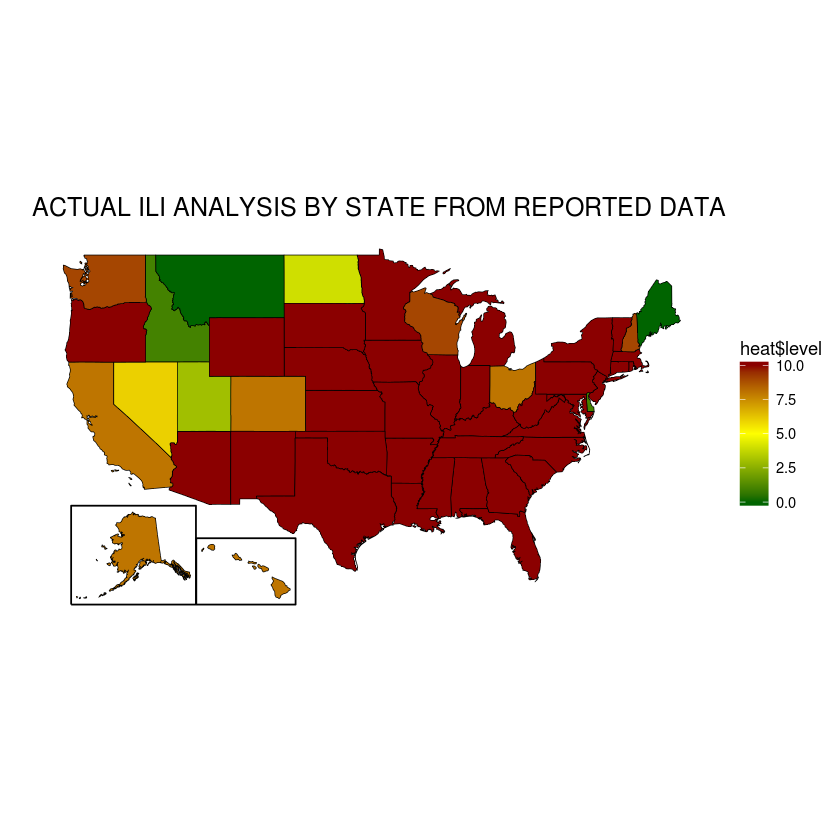

In [60]:
library(ggplot2)
install.packages("fiftystater")
library(fiftystater)
heat<-read.csv("StateDatabyWeekforMap_2017-18week4-4 (1).csv")
#head(heat)
heat$level<-as.integer(gsub("[^0-9\\.]", "", heat$ACTIVITY.LEVEL))

data("fifty_states") # this line is optional due to lazy data loading

crimes <- data.frame(state = tolower(heat$STATENAME), heat$level)

# map_id creates the aesthetic mapping to the state name column in your data
p <- ggplot(crimes, aes(map_id = state)) + 
  # map points to the fifty_states shape data
  geom_map(aes(fill = heat$level),color="black", size=0.2, map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())+
    scale_fill_gradient2(low="darkgreen", mid="yellow", high="darkred", 
                       midpoint=5, limits=range(heat$level))+
    fifty_states_inset_boxes()+
    ggtitle("ACTUAL ILI ANALYSIS BY STATE FROM REPORTED DATA")+
    theme(plot.title = element_text(size=15))
p


# 4) Percentage stacked bar plot

In [85]:
week<-read.csv("VirusViewByWeek.csv")
attach(week)
names(week)
head(week)
weekdat<-subset(week, week$Virus!="A (Subtyping not Performed)" & week$Virus!="H3N2v")
#weekdat$ID <- seq.int(nrow(weekdat))
weekdat$Year<-NULL
weekdat$Week<-NULL

library(reshape2)
datm <- melt(weekdat, id.vars = "Virus")
d<-dcast(datm, Virus ~ variable, sum)
samp2 <- d[,-1]
rownames(samp2) <- d[,1]
datm2 <- melt(d, id.vars = "Virus")
library(dplyr)
library(plyr)
ce = ddply(datm2, "Virus", mutate, percent_val = value/sum(value) * 100)


library(scales)
library(ggplot2)


The following objects are masked from week (pos = 3):

    Virus, Week, X0.4.yr, X25.64.yr, X5.24.yr, X65..yr, Year

The following objects are masked from week (pos = 4):

    Virus, Week, X0.4.yr, X25.64.yr, X5.24.yr, X65..yr, Year

The following objects are masked from week (pos = 5):

    Virus, Week, X0.4.yr, X25.64.yr, X5.24.yr, X65..yr, Year

The following objects are masked from week (pos = 6):

    Virus, Week, X0.4.yr, X25.64.yr, X5.24.yr, X65..yr, Year

The following objects are masked from week (pos = 7):

    Virus, Week, X0.4.yr, X25.64.yr, X5.24.yr, X65..yr, Year

The following objects are masked from week (pos = 8):

    Virus, Week, X0.4.yr, X25.64.yr, X5.24.yr, X65..yr, Year

The following objects are masked from week (pos = 9):

    Virus, Week, X0.4.yr, X25.64.yr, X5.24.yr, X65..yr, Year

The following objects are masked from week (pos = 13):

    Virus, Week, X0.4.yr, X25.64.yr, X5.24.yr, X65..yr, Year



[1] "Year"      "Week"      "Virus"     "X0.4.yr"   "X5.24.yr"  "X25.64.yr"
[7] "X65..yr"

Year,Week,Virus,X0.4.yr,X5.24.yr,X25.64.yr,X65..yr
2017,40,A (H3),7,21,40,43
2017,41,A (H3),6,22,54,44
2017,42,A (H3),12,40,49,51
2017,43,A (H3),17,33,45,51
2017,44,A (H3),20,62,64,71
2017,45,A (H3),29,86,78,85


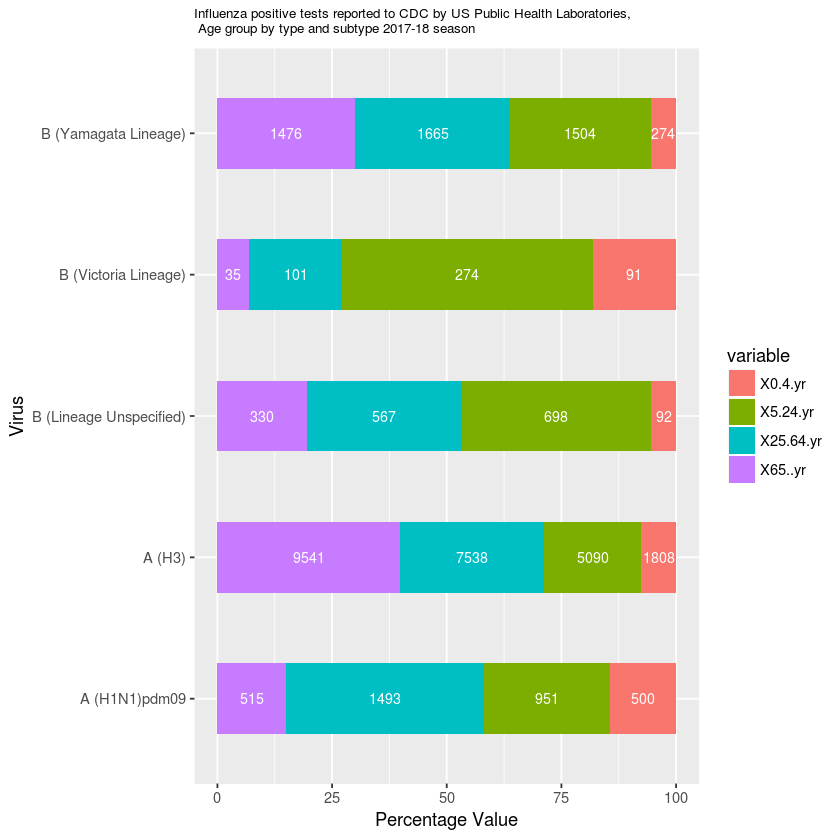

In [78]:
ggplot(ce, aes(x = Virus, y = percent_val, fill = variable, label = value)) +
  geom_bar(stat = "identity",width=0.5) +
  geom_text(size = 3, position = position_stack(vjust = 0.5),col="white")+
  ggtitle("Influenza positive tests reported to CDC by US Public Health Laboratories,\n Age group by type and subtype 2017-18 season")+
  theme(plot.title = element_text(size=8))+
  coord_flip()+
  ylab("Percentage Value")

# 5) Barplot for multiple seasons(Includes deaths of previous and current weeks)

SEASON,WEEK.NUMBER,CURRENT.WEEK.DEATHS,PREVIOUS.WEEKS.DEATHS
2014-15,2014-40,0,1
2014-15,2014-41,0,0
2014-15,2014-42,0,0
2014-15,2014-43,0,1
2014-15,2014-44,0,0
2014-15,2014-45,0,0


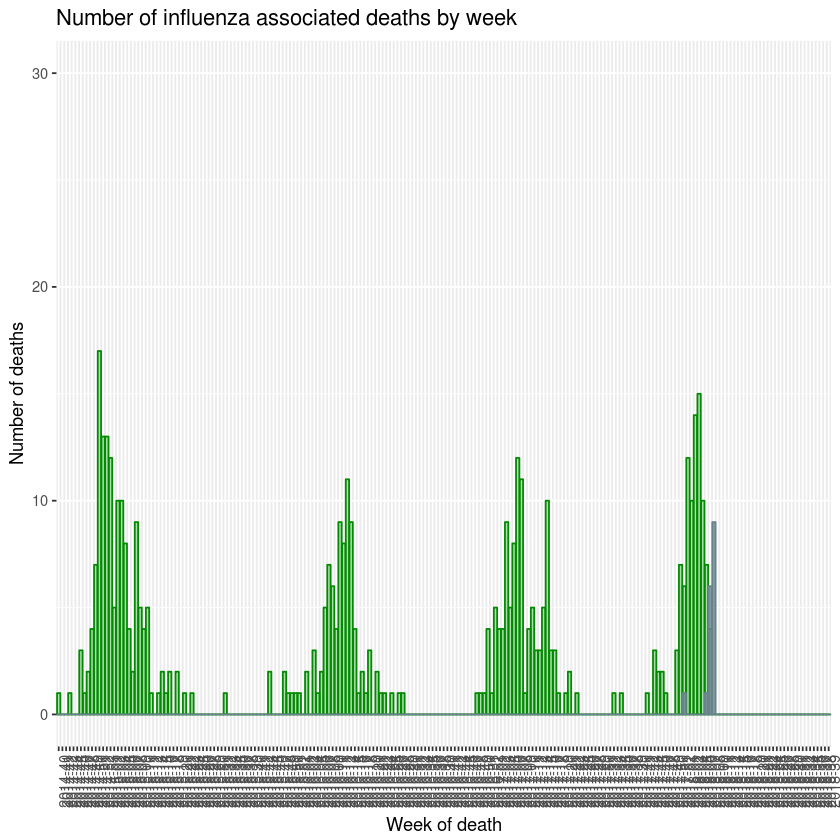

In [86]:
ped<-read.csv("PedFluDeath_WeeklyData.csv",skip=6)
head(ped)
ggplot(data=ped,aes(x=WEEK.NUMBER))+
  geom_bar(aes(y=PREVIOUS.WEEKS.DEATHS),stat="identity",position ="identity",alpha=.3,fill='green4',color='green4') +
  geom_bar(aes(y=CURRENT.WEEK.DEATHS),stat="identity",position ="identity",alpha=.8,fill='lightblue4',color='lightblue4')+ 
  xlab("Week of death") + 
  ylab("Number of deaths")+
  ggtitle("Number of influenza associated deaths by week")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  coord_cartesian(ylim = c(00, 30))

# 6) Line Plot for various seasons

Warning message in split.default(x = seq_len(nrow(x)), f = f, drop = drop, ...):
“data length is not a multiple of split variable”

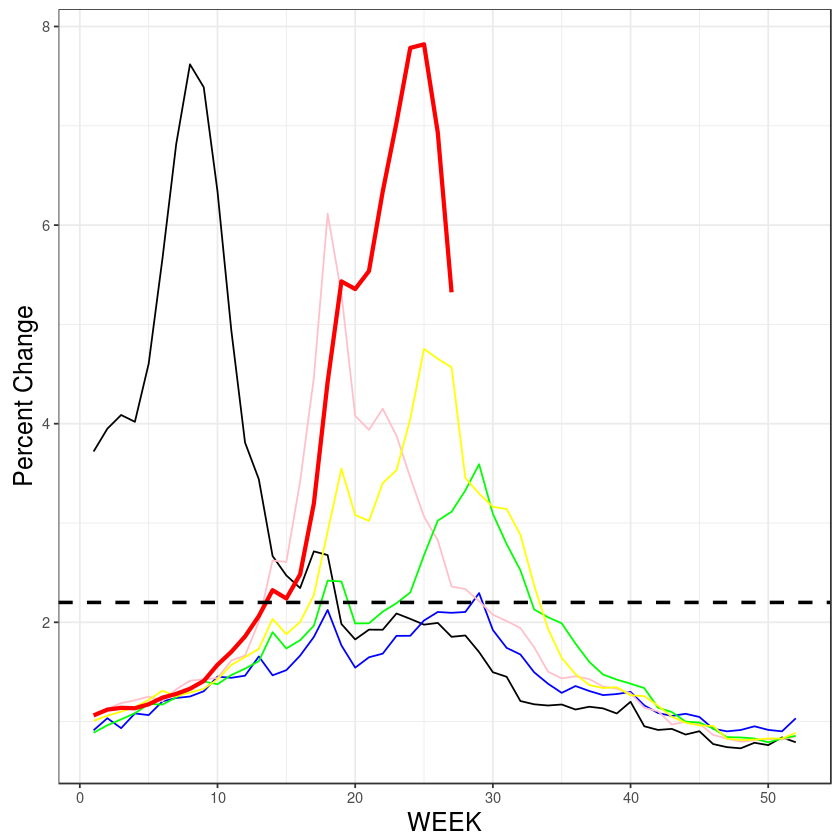

In [119]:
ili<-read.csv("ILINet.csv")

ili<-transform(ili,xyz=interaction(ili$YEAR,formatC(ili$WEEK, width=2, flag="0"),sep=''))
ili$xyz<-as.numeric(as.character(ili$xyz))
d <- split(ili,rep(1:6,each=52))

s1<-as.data.frame(d[1])
s2<-as.data.frame(d[2])
s3<-as.data.frame(d[3])
s4<-as.data.frame(d[4])
s5<-as.data.frame(d[5])
s6<-as.data.frame(d[6])
s1$ID <- seq.int(nrow(s1))
s2$ID <- seq.int(nrow(s2))
s3$ID <- seq.int(nrow(s3))
s4$ID <- seq.int(nrow(s4))
s5$ID <- seq.int(nrow(s5))
s6$ID <- seq.int(nrow(s6))

ggplot() + 
  geom_line(data = s1, aes(x = ID, y = X1.ILITOTAL/X1.TOTAL.PATIENTS*100), color = "black") +
  geom_line(data = s2, aes(x = ID, y = X2.ILITOTAL/X2.TOTAL.PATIENTS*100), color = "blue") +
  geom_line(data = s3, aes(x = ID, y = X3.ILITOTAL/X3.TOTAL.PATIENTS*100), color = "pink") +
  geom_line(data = s4, aes(x = ID, y = X4.ILITOTAL/X4.TOTAL.PATIENTS*100), color = "green") +
  geom_line(data = s5, aes(x = ID, y = X5.ILITOTAL/X5.TOTAL.PATIENTS*100), color = "yellow") +
  geom_line(data = s6, aes(x = ID, y = X6.ILITOTAL/X6.TOTAL.PATIENTS*100), color = "red",size=1.2) +
  
  xlab('WEEK') +
  ylab('Percent Change')+
  theme(legend.position=c(.1,.85))+
  geom_hline(yintercept=2.2, linetype="dashed",size=1.0)+
  scale_colour_manual(name="Error Bars",values=cols)+  theme_bw() +
  theme(axis.title.x = element_text(size = 15, vjust=-.2)) +
  theme(axis.title.y = element_text(size = 15, vjust=0.3))
  
